Alex Hemmerlin
Comp 435 Project 1
Data Exploration
English Handwritten Characters: https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset

About the Dataset:
The dataset contains 3,410 unique images of handwritten English characters. The characters are lowercase alphabetical: a-z, uppercase alphabetical: A-Z, and numeric digits: 0-9. This results in 62 classes (26+26+10) with 55 images of each class represented in the dataset.

The class label is the character that is represented in the image (0-9, A-Z, a-z). The feature is the image which is a 1200x900 png image.

In [521]:
# Comments of the format ***[DESCRIPTION]*** denote the origin of each code block

In [522]:
# Citation
# @InProceedings{deCampos09,
#   author    = "de Campos, T.~E. and Babu, B.~R. and Varma, M.",
#   title     = "Character recognition in natural images",
#   booktitle = "Proceedings of the International Conference on Computer
#   Vision Theory and Applications, Lisbon, Portugal",
#   month     = "February",
#   year      = "2009",
# }

In [ ]:
# TODO: Ideas for data exploration:
# 1. Write code to lower the resolution of the images - DONE
#   - Iteratively see how they look before and after and where it might be too compressed to model well
# 2. See if ratio of coverage (writing to blank space) differs between some letters
# 3. See if height and width differ significantly between certain letters
# 4. Possibly use libraries to mark endpoints
# 5. Possibly use libraries to find enclosed white space

In [524]:
# ***MY CODE***
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

DATASET_PATH: str = 'dataset/english.csv'               # path to the csv file
BASE_IMAGE_PATH: str = 'dataset/Img/'                   # path to the Img folder (concat the image string in the csv to the end to get the path to the image)
COMPRESSED_IMAGE_PATH: str = 'dataset/Img_compressed/'  # path to the compressed images

In [525]:
# ***MY CODE***
df = pd.read_csv(DATASET_PATH)
df.head()


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


DataFrame consists of two columns:
- The first is the path to the image
- The second is the image label

In [526]:
df['image'] = df['image'].str[4:]
df.head()

,image,label
0,img001-001.png,0
1,img001-002.png,0
2,img001-003.png,0
3,img001-004.png,0
4,img001-005.png,0


In [527]:
# ***MY CODE***
df["label"].value_counts()

0    55
k    55
X    55
Y    55
Z    55
     ..
P    55
Q    55
R    55
S    55
z    55
Name: label, Length: 62, dtype: int64

All classes are equally represented, and there are no missing labels or unusual values

In [528]:
# ***CODE FROM https://www.kaggle.com/code/nourrrgfvutf/english-characters CODE BLOCK 19***

# def display_images(rows, cols, images, labels, decoder):
#     _, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(12,6))

#     for i, ax in enumerate(axes.flatten()):
#         ax.imshow(images[i], cmap='gray')
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_title(f"Label: {decoder[np.where(labels[i]==1)[0][0]]}")
        
# display_images(3, 3, images, labels, decoder)

In [529]:
# ***ABOVE CODE - MODIFIED BY ME***
def display_images(rows, cols, images, labels, examples=None): # added examples so that I can plot the example number as well
    _, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(12,6)) # changed to actually use the rows and cols args
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if examples is not None:
            ax.set_title(f'Label: {labels[i]}  Ex:{examples[i]}') # changed because I don't need to decode the labels
        else:
            ax.set_title(f'Label: {labels[i]}')


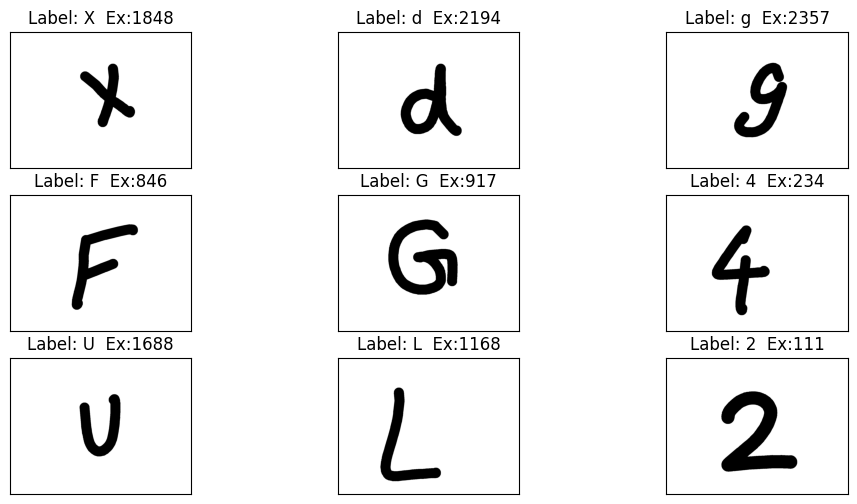

In [530]:
# ***MY CODE***
rows = 3
cols = 3
images = []
labels = []
examples = []
for _ in range(rows*cols):
    num: int = random.randint(0, 3410)
    images.append(Image.open(f'{BASE_IMAGE_PATH}{df["image"][num]}'))
    labels.append(df['label'][num])
    examples.append(num)

# Plot/Display Random examples from the dataset
display_images(rows, cols, images, labels, examples)

Interesting Examples:
- 2993 (cursive s)
- 2972 (cursive s)
- 1382 (P looks like p)
- 1041 (I looks like l) -> (capital i, but looks like lowercase L)
- 2816 (cursive p looks like h)
- 2157 (d looks like a)
- 2234 (e looks like c)
- 3409 (cursive z)
- 2969 (cursive r)

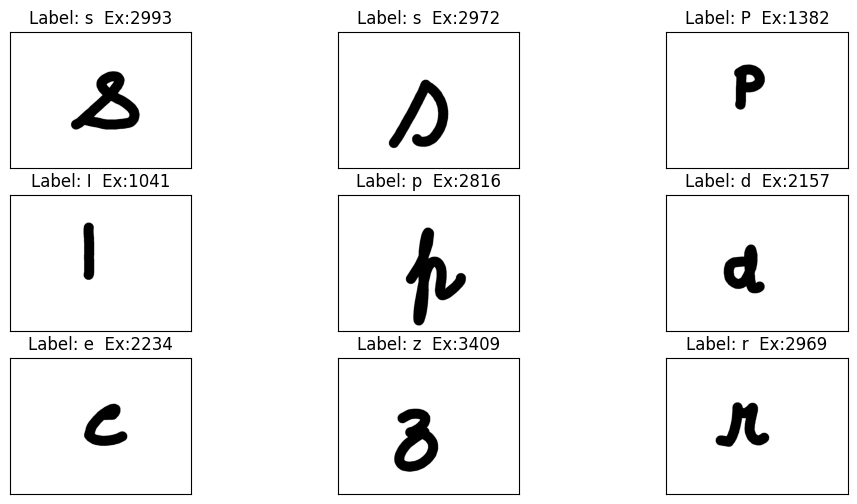

In [531]:
# ***MY CODE***
# Displays a few interesting examples that I found in the data set
interesting_examples = [2993, 2972, 1382, 1041, 2816, 2157, 2234, 3409, 2969]
display_images(3, 3, [Image.open(f'{BASE_IMAGE_PATH}{df["image"][ex]}') for ex in interesting_examples], [df['label'][ex] for ex in interesting_examples], interesting_examples)

The images are 1200x900 in size, which is far bigger than necessary. So, in order to simplify the model and improve efficiency, I will resize the images to be smaller. I will start by looking at example 2993 (displayed above), the cursive s, and I will iteratively resize until the small portion in the center of the s is lost. Then I will look at a few other examples to determine the proper dimensions to resize to.

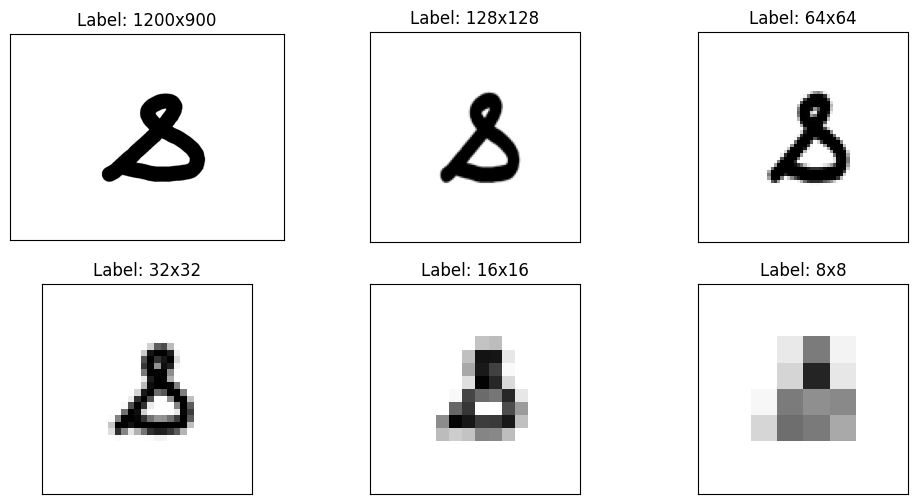

In [532]:
# ***MY CODE***
img_s1 = Image.open(f'{BASE_IMAGE_PATH}{df["image"][2993]}')
resized_images = []
labels = ['1200x900','128x128','64x64','32x32','16x16','8x8']
resized_images.append(img_s1)
resized_images.append(img_s1.resize((128,128)))
resized_images.append(img_s1.resize((64,64)))
resized_images.append(img_s1.resize((32,32)))
resized_images.append(img_s1.resize((16,16)))
resized_images.append(img_s1.resize((8,8)))
display_images(2,3,resized_images,labels)

The above plot shows the same image in 6 different sizes: the original size (1200x900), 128x128, 64x64, 32x32, 16x16, and 8x8.

From the above plot, we can see that 8 by 8 is definitely too small and it is very likely that 16 by 16 is also probably too small. 32 by 32 still allows to kind of see the that spot in the middle at the top of the s, but it looks like there are no pure white pixels in it anymore which means that we won't be able to just use a binary feature of if the pixel is colored or not. We would have to either do additional cleaning to white out less colored pixels or include the darkness of the pixel in the model.

Resized to 64 by 64, the image is still very clear and the information loss appears to be very minimal.

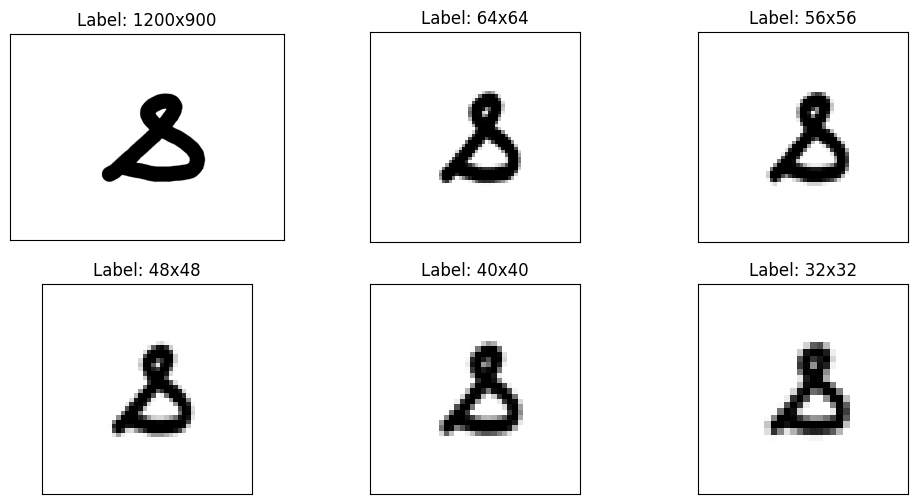

In [533]:
# ***MY CODE***
img_s1 = Image.open(f'{BASE_IMAGE_PATH}{df["image"][2993]}')
resized_images = []
labels = ['1200x900','64x64','56x56','48x48','40x40','32x32']
resized_images.append(img_s1)
resized_images.append(img_s1.resize((64,64)))
resized_images.append(img_s1.resize((56,56)))
resized_images.append(img_s1.resize((48,48)))
resized_images.append(img_s1.resize((40,40)))
resized_images.append(img_s1.resize((32,32)))
display_images(2,3,resized_images,labels)

The above plot shows the same image again in more sizes. It includes the original size, 64x64, and 32x32, but this time it also includes 3 more sizes between 64x64 and 32x32 since those seemed like the best two sizes last time.

From the above plot, we can see that the last size which shows the center of the s with a pure white pixel is the 48x48 size. This leads me to conclude that 48x48 is likely the most that I want to compress the images and still keep enough of the information that the loss is minimal. However, we will need to check this against more images in the dataset.

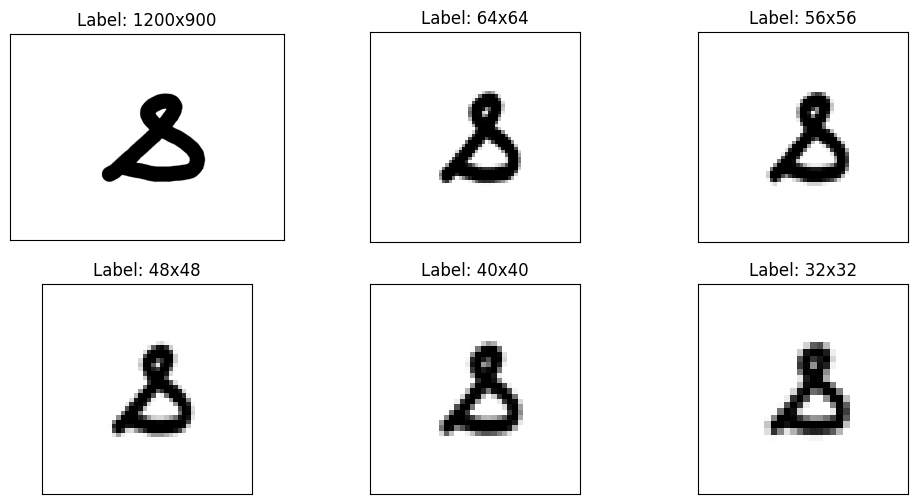

In [534]:
# ***MY CODE***
img_s1 = Image.open(f'{BASE_IMAGE_PATH}{df["image"][2993]}')
resized_images = []
labels = ['1200x900','64x64','56x56','48x48','40x40','32x32']
resized_images.append(img_s1)
resized_images.append(img_s1.resize((64,64)))
resized_images.append(img_s1.resize((56,56)))
resized_images.append(img_s1.resize((48,48)))
resized_images.append(img_s1.resize((40,40)))
resized_images.append(img_s1.resize((32,32)))
display_images(2,3,resized_images,labels)

Additional Examples to Test:
- 2869 (q)
- 450 (8)
- 2203 (e)
- 1216 (M)

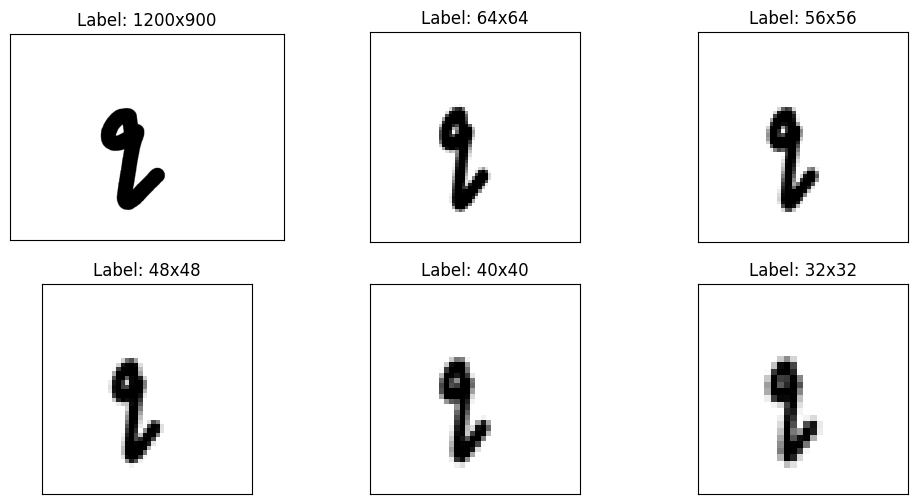

In [ ]:
# ***MY CODE***
img_q1 = Image.open(f'{BASE_IMAGE_PATH}{df["image"][2869]}')
resized_images = []
labels = ['1200x900','64x64','56x56','48x48','40x40','32x32']
resized_images.append(img_q1)
resized_images.append(img_q1.resize((64,64)))
resized_images.append(img_q1.resize((56,56)))
resized_images.append(img_q1.resize((48,48)))
resized_images.append(img_q1.resize((40,40)))
resized_images.append(img_q1.resize((32,32)))
display_images(2,3,resized_images,labels)

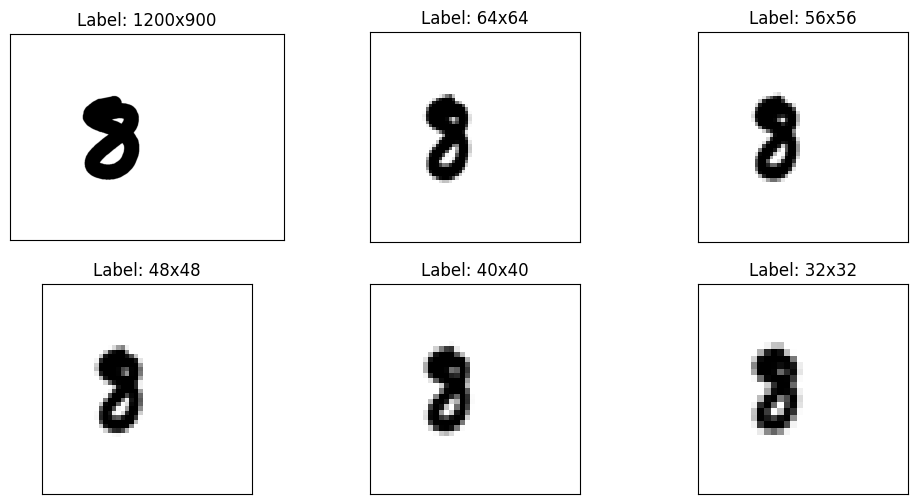

In [ ]:
# ***MY CODE***
img_81 = Image.open(f'{BASE_IMAGE_PATH}{df["image"][450]}')
resized_images = []
labels = ['1200x900','64x64','56x56','48x48','40x40','32x32']
resized_images.append(img_81)
resized_images.append(img_81.resize((64,64)))
resized_images.append(img_81.resize((56,56)))
resized_images.append(img_81.resize((48,48)))
resized_images.append(img_81.resize((40,40)))
resized_images.append(img_81.resize((32,32)))
display_images(2,3,resized_images,labels)

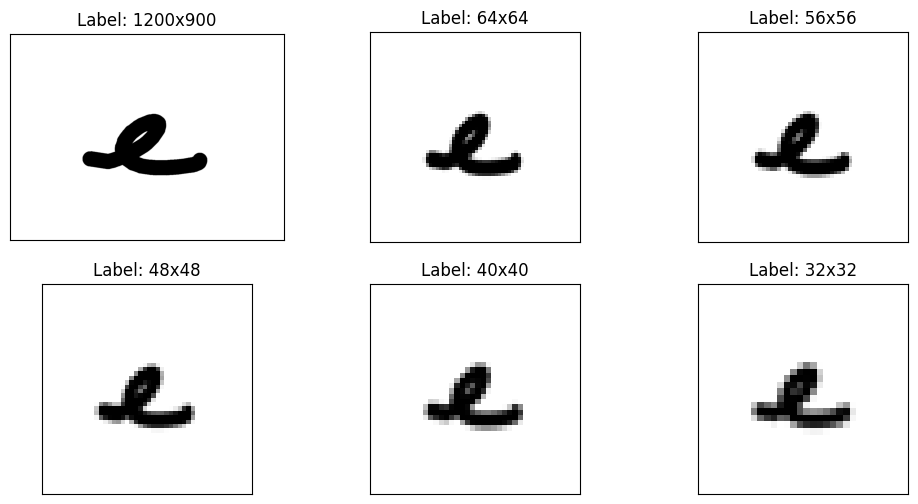

In [ ]:
# ***MY CODE***
img_e1 = Image.open(f'{BASE_IMAGE_PATH}{df["image"][2203]}')
resized_images = []
labels = ['1200x900','64x64','56x56','48x48','40x40','32x32']
resized_images.append(img_e1)
resized_images.append(img_e1.resize((64,64)))
resized_images.append(img_e1.resize((56,56)))
resized_images.append(img_e1.resize((48,48)))
resized_images.append(img_e1.resize((40,40)))
resized_images.append(img_e1.resize((32,32)))
display_images(2,3,resized_images,labels)

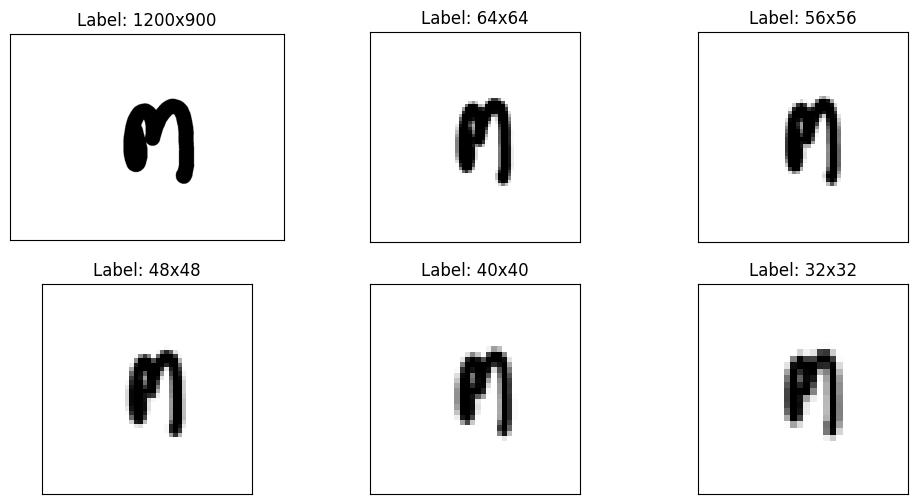

In [ ]:
# ***MY CODE***
img_m1 = Image.open(f'{BASE_IMAGE_PATH}{df["image"][1216]}')
resized_images = []
labels = ['1200x900','64x64','56x56','48x48','40x40','32x32']
resized_images.append(img_m1)
resized_images.append(img_m1.resize((64,64)))
resized_images.append(img_m1.resize((56,56)))
resized_images.append(img_m1.resize((48,48)))
resized_images.append(img_m1.resize((40,40)))
resized_images.append(img_m1.resize((32,32)))
display_images(2,3,resized_images,labels)

The q looked good at 48x48 with the center still being easily found and distinguished. However, the 8, e, and M all required higher resolution to be able to still have at least one pure white pixel in their centers. The e and M still did not have a pure white pixel even at 64x64. This leads me to believe that it would probably be best to either transform some of the lightest pixels back to white at low resolution, or to incorporate the darkness of the pixel on a scale of 1-3 or 1-5 in the model. I think that either of these changes would make 48x48 good enough for the model.